In [1]:
"""répertoire courant où se trouve les données : C:/Users/VP/Documents/OC/P6/"""

seed = 42

import numpy as np
import pandas as pd
import os
import re
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.io import output_notebook
output_notebook() # bokey graphs embedd
import seaborn as sns
sns.set()
plt.rc('figure', figsize=(10, 6))

import pickle

import gensim
import spacy
import nltk

import IPython.display

from math import ceil

from collections import defaultdict
from operator import itemgetter

seed = 7

os.chdir('C:/Users/VP/Google Drive/Education/OC/working_directory')

ModuleNotFoundError: No module named 'bokeh'

In [ ]:
"""display options"""

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# pd.reset_option("max_colwidth")

In [ ]:
"""Importing functions and style params"""
os.chdir('C:/Users/VP/Google Drive/Education/OC/working_directory')
%run -i useful_functions.py

In [ ]:
set_style_pers()

**Import des données**

**Exploratory Data Analysis**

**Objectif**: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.

**I - Analyse de la forme:**
- Identification de la target\

- Nombre des lignes et de colonnes\

- Suppression des variables explicatives très corrélées

- Types et groupes de variables

- Identification des valeurs manquantes 

- identification des doublons

- identification des valeurs aberrantes

**II - Analyse du fond:**
- Visualisation de la target (histogramme/boxplot)\

- Compréhension des différentes variables (recherche)\

Variables avec un skew poditif pour la plupart du au outliers

- Visualisation des relations : features/target: analyse bivariée

pas de corrélation entre variables numériques sauf. Corrélation négative entre la longueur des commenataires et la note ainsi que entre la délai de livraison et la note

- Visualisation des relations : features/target: analyse multivariée

- Identification des outliers

**Pre-processing**

**Objectif**: transformer le data pour le mettre dans un format propice au machine learning

- Encodage

One hot encoding pour payment et day_shift

- Élimination des NaN : dropna(), imputation, colonne"vides"

On supprime les lignes contenant des NaN (à part les reviews) étant donné leur faible pourcentage data_orders (0.63%) et data_products (0.82%). Une analyse sur le taux de cancelled par statut de la commande n'a pas rélélé de corrélation entre un bucket autre que Delivered particulier et le taux de NaN
    
- Suppression des outliers néfastes au modèle

supression des outlier par IQR pour les colones numériques avec cardinalité > 30. Si < 30, trop de lignes sont exclues

- Feature scaling

centrage réduction pour les variables numériques

- Feature selection


- Imputation des valeurs manquantes

**Modelling**

Objectif: développer un modèle de machine learning capable de répondre a l'objectif final.

-  Définir une fonction d'évaluation

- Entrainement de différents modèles

- Optimisation avec RandomsearchCV et GridSearchCV

- Analyse des erreurs et retour au Preprocessing / EDA

- Features importance

- Learning Curve et prise de décision

# Import et mise en forme des données

In [ ]:
data_t_raw = pd.read_csv("D:/Dowloads_D/Data_OC/P6/Dataset+projet+prétraitement+textes+images/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [ ]:
data_t_raw.shape

In [7]:
dfs_insight({'data_t_raw': data_t_raw})

  df-wise information 
      name_df          shape  % NaN # duplicated rows
0  data_t_raw  ((1050, 15),)  2.17%                 0 

  column-wise information 
 data_t_raw 
                           dtype  # dupplicated entries avg_nan_col
uniq_id                   object                    0.0       0.00%
crawl_timestamp           object                  901.0       0.00%
product_url               object                    0.0       0.00%
product_name              object                    0.0       0.00%
product_category_tree     object                  408.0       0.00%
pid                       object                    0.0       0.00%
retail_price             float64                  695.0       0.10%
discounted_price         float64                  625.0       0.10%
image                     object                    0.0       0.00%
is_FK_Advantage_product     bool                 1048.0       0.00%
description               object                    0.0       0.00%
product_rat

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   

                                                                                                                  product_url  \
0  http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z   
1                                  http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2                         http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   

                                                 product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                  Sathiyas Cotton Bath Towel   
2                         Eurospa Cotton Terry Face Towel Set   

                                                                                                                       product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  \
0  Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give 

----------------------------------------------------------------------


## Harmonisation target catégories

In [8]:
pdt_cats = sorted(data_t_raw['product_category_tree'].unique())

In [9]:
# le problème est que les différentes catégories n'ont pas la même profondeur, il faut toutes les plus petites sous-catégories
pdt_cats[:5]

['["Baby Care >> Baby & Kids Gifts >> Decorations >> Doraemon Gift Family Ceramic Coffee Mug Decorations >> Doraemon Gift Family Ceramic Coffee Mug Multicol..."]',
 '["Baby Care >> Baby & Kids Gifts >> Photo Frames >> Cocovey Photo Frames"]',
 '["Baby Care >> Baby & Kids Gifts >> Photo Frames >> Indha Craft Photo Frames"]',
 '["Baby Care >> Baby & Kids Gifts >> Photo Frames >> MH Photo Frames"]',
 '["Baby Care >> Baby & Kids Gifts >> Photo Frames >> Wood Beauty Photo Frames"]']

In [10]:
data_cats = data_t_raw.copy()

In [11]:
# we create empty columns for sub-categories
nb_cats = len(data_cats['product_category_tree'].str.split('>>', expand=True).columns)
sub_cats = ['cat_{}'.format(cat) for cat in range(nb_cats)]
for cat in range(7):
    data_cats['cat_{}'.format(cat)] = np.nan

In [12]:
# we split the tree of categories into the categories columns
data_cats[['cat_{}'.format(cat) for cat in range(nb_cats)]] = data_cats['product_category_tree'].str.split('>>', expand=True)

In [13]:
data_cats[sub_cats]

cat_0                     cat_1               cat_2  \
0     ["Home Furnishing    Curtains & Accessories            Curtains    
1           ["Baby Care          Baby Bath & Skin    Baby Bath Towels    
2           ["Baby Care          Baby Bath & Skin    Baby Bath Towels    
3     ["Home Furnishing                 Bed Linen           Bedsheets    
4     ["Home Furnishing                 Bed Linen           Bedsheets    
...                  ...                       ...                 ...   
1045        ["Baby Care         Baby & Kids Gifts            Stickers    
1046        ["Baby Care         Baby & Kids Gifts            Stickers    
1047        ["Baby Care         Baby & Kids Gifts            Stickers    
1048        ["Baby Care         Baby & Kids Gifts            Stickers    
1049        ["Baby Care         Baby & Kids Gifts            Stickers    

                                                       cat_3  \
0      Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1                                 Sathiyas Baby Bath Towels    
2                                  Eurospa Baby Bath Towels    
3                           SANTOSH ROYAL FASHION Bedsheets    
4                                    Jaipur Print Bedsheets    
...                                                      ...   
1045                                 Oren Empower Stickers"]   
1046                                   Wallmantra Stickers"]   
1047                                     Uberlyfe Stickers"]   
1048                                   Wallmantra Stickers"]   
1049                                     Uberlyfe Stickers"]   

                                                       cat_4 cat_5 cat_6  
0                                                       None  None  None  
1      Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]  None  None  
2      Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]  None  None  
3      SANTOSH ROYAL FASHION Cotton Printed King sized ..."]  None  None  
4      Jaipur Print Cotton Floral King sized Double Bed..."]  None  None  
...                                                      ...   ...   ...  
1045                                                    None  None  None  
1046                                                    None  None  None  
1047                                                    None  None  None  
1048                                                    None  None  None  
1049                                                    None  None  None  

[1050 rows x 7 columns]

In [14]:
# we strip white space at head and tail of each category
for col in sub_cats:
        data_cats[col] = data_cats[col].apply(lambda x: re.sub('[^a-zA-Z\d\s:\u00C0-\u00FF]', '',x.strip()) if x is not None else x)

In [15]:
# on va maintenant pour chaque colonne de catégorie, pour chaque ligne, associer le nombe d'occurences de la catégorie dans une nouvelle colonne
# count_cat_i
count_sub_cats = ['count_cat_{}'.format(cat) for cat in range(nb_cats)]
def cat_count(df, cols):
    for col in cols:
        df['count_{}'.format(col)] = df[col].apply(lambda x: len(df[cols][col][df[cols][col] == x]))

In [16]:
cat_count(data_cats, sub_cats)

In [17]:
# L'objectif est maintenant de créer une colonne cat dans laquelle on affecte la plus petite sous-catégorie ayant au moins 10 occurences
# nous créons tout d'abord une fonction qui a chaque ligne associe la plus petite sous-catégorie ayant au moins 10 occurences
def final_cat(x, nb_cats=7):
    for i in range(nb_cats):
        if x['cat_{}'.format(6 - i)] is not None:
            if x['count_cat_{}'.format(6 - i)] >= 20:
                if i == 6:
                    return x['cat_0']
                if x['count_cat_{}'.format(6 - i -1)] - x['count_cat_{}'.format(6 - i)] >=20:
                    return x['cat_{}'.format(6 - i)]

In [18]:
# on applique maintenant cette fonction à chaque ligne du df avec apply en précisant axis=1
data_cats['cat'] = data_cats.apply(lambda x: final_cat(x), axis=1)
# on ajoute le nombre d'occurence associée à la catégorie déterminée ci-dessus
data_cats['count_cat'] = data_cats['cat'].apply(lambda x: len(data_cats[data_cats['cat'] == x]))

In [19]:
# check
data_cats[['product_name', *sub_cats, *count_sub_cats, 'cat', 'count_cat']][ data_cats[[*sub_cats, *count_sub_cats, 'cat', 'count_cat']]['cat_2'] == 'Eyes' ].sort_values(by='count_cat')

product_name  \
1005                                            Milani Runway shadow Wet/Dry Black Out 3 g   
1006  e.l.f. Cosmetics Studio brow Kit Ash Brow Makeup Brush Mirror Girly Elf Fun Sexy 3 g   

                         cat_0   cat_1 cat_2        cat_3  \
1005  Beauty and Personal Care  Makeup  Eyes  Eye Shadows   
1006  Beauty and Personal Care  Makeup  Eyes  Eye Shadows   

                          cat_4  \
1005         Milani Eye Shadows   
1006  elf Cosmetics Eye Shadows   

                                                 cat_5 cat_6  count_cat_0  \
1005  Milani Runway shadow WetDry Black Out 3 g Shadow  None          150   
1006     elf Cosmetics Studio brow Kit Ash Brow Makeup  None          150   

      count_cat_1  count_cat_2  count_cat_3  count_cat_4  count_cat_5  \
1005           18            2            2            1            1   
1006           18            2            2            1            1   

      count_cat_6                       cat  count_cat  
1005            0  Beauty and Personal Care         61  
1006            0  Beauty and Personal Care         61

In [20]:
# check
data_cats[[*sub_cats, *count_sub_cats, 'cat', 'count_cat']][data_cats[[*sub_cats, *count_sub_cats, 'cat', 'count_cat']]['count_cat'] < 5].sort_values(by='count_cat', ascending=False)

Empty DataFrame
Columns: [cat_0, cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, count_cat_0, count_cat_1, count_cat_2, count_cat_3, count_cat_4, count_cat_5, count_cat_6, cat, count_cat]
Index: []

In [21]:
# nb d'occurences par nouvelle catégorie
data_cats['cat'].value_counts()

Watches                      127
Baby Care                     66
Bed Linen                     65
Fragrances                    65
Home Furnishing               64
Beauty and Personal Care      61
Network Components            49
Kitchen  Dining               49
USB Gadgets                   38
Showpieces                    37
Baby Boys Clothes             35
Ethnic                        34
Home Decor  Festive Needs     30
Baby Girls Clothes            28
Table Decor  Handicrafts      27
Laptop Accessories            27
Cookware                      27
Coffee Mugs                   26
Prithish Coffee Mugs          26
Combos and Kits               24
Maxima Wrist Watches          23
Wall Decor  Clocks            22
Batteries                     22
Rockmantra Coffee Mugs        22
Bath Linen                    21
Dresses  Skirts               21
Computers                     14
Name: cat, dtype: int64

In [22]:
len(data_cats['cat'].unique())

27

## Tokenisation et normalisation

In [23]:
# réduisons la taille du dataset en gardant cetaines variables utiles à la vérification
data_a_net = data_cats.copy()
data_a_net.drop(
    [# 'uniq_id'
	 'crawl_timestamp'
	# , 'product_url'
	# , 'product_name'
	, 'product_category_tree'
	, 'pid', 'retail_price'
	, 'discounted_price'
	# , 'image'
	, 'is_FK_Advantage_product'
	# , 'description'
	, 'product_rating'
	, 'overall_rating'
	, 'brand'
	, 'product_specifications'], axis=1, inplace=True)

In [24]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [25]:
# Import the English language class
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer
import en_core_web_md
spacy_model = en_core_web_md.load()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
# tokenizer = nlp.tokenizer

In [26]:
# on utilise une classe qui va convertir les noms au pluriel au singulier
import inflect
p = inflect.engine()

# on crée une fonction pour appliquer la conversion ligne par ligne
def singularize(word):
    if p.singular_noun(word) == False:
        return word
    else:
        return(p.singular_noun(word))

In [27]:
# dat used for word count and tf-idf, sentences are string
data_net = data_a_net.copy()
# data used for word2vec that needs sentences as lists of word
data_to_emb = data_a_net.copy()

# on réalise la normalisation
data_to_emb['Tokens'] = data_a_net['description'].apply(lambda text: [singularize(token.lemma_.lower()) for token in spacy_model(text)
                                                                               # if token.is_alpha
                                                                               # if not token.is_punct 
                                                                               if not token.is_stop
                                                                               if token.pos_ in ['ADJ', 'NUM', 'PROPN',
                                                                                                'VERB']
                                                                               # if re.search('^[A-Za-z0-9]{2,}$',str(token)) is not None
                                                                     ])
"""# il nous reste des lettres isolées 'r', 'n', qu'on va exclure de chaque doc
def letter_check(list_tokens):
    list_clean = []
    for token in list_tokens:
        if len(token)>2:
            list_clean.append(token)
    return list_clean"""
    
# data_to_emb['Tokens'] = data_to_emb['Tokens'].apply(letter_check)

# on présente les docs sous forme de string pour word count et tf-idf
data_net['Tokens'] = data_to_emb['Tokens'].apply(lambda text: ', '.join(text))


In [28]:
re.search('^[A-Za-z0-9]+$','rcuir') is not None

True

In [29]:
data_net[['description', 'Tokens']].tail(5)

description  \
1045  Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n                         Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This will d�cor the wall like 3d look. Tree with the green shaded leaves will give the sharp feature of the greenery. Reusable i.e. Can be used again after applied once. Simple remove and re-use the sticker on same or another wall with a different idea\r\n\r\nHow to install?\r\n\r\n1) The surface you wish to attach your decal must be clean \r\nand free from dust, grease or any other contamination.\r\n \r\n2) Simply peel those pre-cut pieces of wall stickers off from \r\nbacking paper and apply them on the desired area.\r\nNOTE: \r\n1. Freshly painted or lacquered \r\nsurfaces must be allowed to completely cure before the decal is applied. We \r\nrecommend waiting for minimum of 2-3 weeks. 2. \r\nWe discourage installation on certain surfaces such as brick, stucco, concrete \r\nblock, suede paints, and sand paints. 3. Do not apply \r\non wet walls\r\n3) Press firmly to squeeze out any air bubbles.\r\nNote: It will be helpful and fun \r\nif you take help of your friends or family members to stick the wall decals on your \r\nwall and please Do not apply on wet walls.\r\nDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This will d�cor the wall like 3d look. Tree with the green shaded leaves will give the sharp feature of the greenery. Reusable i.e. Can be used again after applied once. Simple remove and re-use the sticker on same or another wall with a different idea\r\n\r\nHow to install?\r\n\r\n1) The surface you wish to attach your decal must be clean \r\nand free from dust, grease or any other contamination.\r\n \r\n2) Simply peel those pre-cut pieces of wall stickers off from \r\nbacking paper and apply them on the desired area.\r\nNOTE: \r\n1. Freshly painted or lacquered \r\nsurfaces must be allowed to completely cure before the decal is applied. We \r\nrecommend waiting for minimum of 2-3 weeks. 2. \r\nWe discourage installation on certain surfaces such as brick, stucco, concrete \r\nblock, suede paints, and sand paints. 3. Do not apply \r\non wet walls\r\n3) Press firmly to squeeze out any air bubbles.\r\nNote: It will be helpful and fun \r\nif you take help of your friends or family members to stick the wall decals on your \r\nwall and please Do not apply on wet walls.   
1046                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n                         Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend, sweeping the world of interior design, as a quick and easy way to personalise and transform your home. We at Wallmantra use only the highest quality premium self-adhesive vinyl for our products to ensure you receive the best quality product.\r\nThe sizes are in inches (Width x Height), rounded to the nearest inch. The size of the product is the final size that will be

# Distribution des catégories

In [30]:
set_style_pers()
sns.barplot(x=data_net.groupby('cat_0')['uniq_id'].count().values, y=data_net.groupby('cat_0')['uniq_id'].count().index)
plt.xlabel('Count of products')

Text(0.5, 0, 'Count of products')

In [31]:
plt.gcf().set_size_inches(12,8)
sns.barplot(x=data_net.groupby('cat')['uniq_id'].count().values, y=data_net.groupby('cat')['uniq_id'].count().index)
plt.xlabel('Count of products')

Text(0.5, 0, 'Count of products')

# Distribution des tokens

In [32]:
# lest's capture all unique tokens in a list
list_uniques_token = []
# let's create a list with all tokens to count the number of occurences in all docs
list_all_tokens = []

for doc in data_to_emb['Tokens'].values:
    list_all_tokens += doc
    for token in doc:
        if token not in list_uniques_token:
            list_uniques_token.append(token)
                   
print(len(list_uniques_token), len(list_all_tokens))

4520 40610


In [33]:
# computing the number of occurences per token in all docs
from collections import Counter

ocurences_token = sorted(dict(Counter(list_all_tokens)).items(), 
       key=lambda item:item[1],
       reverse=False)

# let's see how many tokens appear less than 5 times
low_ocurences_token = []
for token, occ in ocurences_token:
    if occ < 5:
        low_ocurences_token.append(token)

In [34]:
len(dict(Counter(list_all_tokens)).keys())

4520

In [35]:
len(low_ocurences_token)

3340

In [36]:
# which gives us 1358 vectors of words appearing more than 5 times
4144 - len(low_ocurences_token)

804

# Count matrix

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
word_doc_matrix = vectorizer.fit_transform(data_net['Tokens'].values)

In [38]:
# créons un dictionnaie comptant le nombre d'occurences pour chaque mot
word_count_sum = dict(zip(vectorizer.vocabulary_.keys(), [int(count) for count in word_doc_matrix.sum(1)]))

In [39]:
sorted(word_count_sum.items(), key=lambda x:x[1], reverse = True)[:5]

[('bowl', 221),
 ('certification', 180),
 ('special', 178),
 ('clay', 173),
 ('jack', 167)]

# TF-IDF Matrix

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer() # jouer sur min_df pour exclure les mots rares
tf_idf_matrix = tf_idf_vectorizer.fit_transform(data_net['Tokens'].values)


tf_idf_vectorizer_508 = TfidfVectorizer(min_df=5, max_df=0.8) # jouer sur min_df pour exclure les mots rares
tf_idf_508_matrix = tf_idf_vectorizer_508.fit_transform(data_net['Tokens'].values)

In [41]:
tf_idf_matrix.shape
# tf_idf_508_matrix.shape

(1050, 4260)

In [42]:
# check
# data_net['Tokens'].values

In [43]:
# check
# print(vectorizer.get_feature_names())

# Embeding

## Word2vec

### Gensim customized

L'o bjecif est ici d'obtenir un vecteur par desciption de produit. ce vecteur sera la moyenne des vecteurs de chaque mots pondérés par l'IDF des mots. Le format final doit être un df avec les docs en lignes et les coordonnées du vecteurs de chaque doc en colonnes. Cela est necéssaire pour exploiter l'embedding avec UMAP, t-sne

In [44]:
from gensim.models import Word2Vec

In [45]:
size_vec = 10
model = Word2Vec(data_to_emb['Tokens'].values
                 ,seed=seed
                 ,sg=1 
                 ,size=size_vec  
                 ,workers=1) # 1 worker max for fully reproducible run

In [46]:
# data_to_emb['Tokens'].values

In [47]:
len(model.wv.vocab.keys())

1180

In [48]:
model.wv.vector_size

10

In [49]:
model.wv.get_vector('sticker')

array([ 0.2349911 ,  0.40474957,  0.29917434, -0.20250034,  0.436647  ,
        0.5429582 ,  0.67978   , -0.4202395 ,  0.3923694 , -0.7513678 ],
      dtype=float32)

In [50]:
model.wv.most_similar('sticker')

[('vanity', 0.9774571657180786),
 ('vinyl', 0.9764077663421631),
 ('jewellery', 0.9755451679229736),
 ('low', 0.9698841571807861),
 ('almond', 0.9637616872787476),
 ('honey', 0.9579757452011108),
 ('rice', 0.9578539133071899),
 ('10.5', 0.9564672708511353),
 ('card', 0.9523640871047974),
 ('showpiece', 0.9509392380714417)]

In [51]:
# saving vectors as a matrix for modelling
w2vec_vectors = model.wv.vectors
w2v = dict(zip(model.wv.index2word, model.wv.vectors))

In [52]:
len(list(w2v.values())[0])

10

#### Test

http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

In [53]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(list(word2vec.values())[0])
        # self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [54]:
# tf_idf_w2v = TfidfEmbeddingVectorizer(w2v)

In [55]:
# tf_idf_w2v.fit(data_net['Tokens'].values, y)

#### Fin du test

#### poids IDF

In [56]:
# on souhaite maintenant appliquer à chaque vecteur son coefficient IDF afin de prendre en compte la présence du mots
# dans les différents documents

# on récupère pour chaque mot son poids idf
words_idf = defaultdict(lambda: max(tf_idf_vectorizer.idf_), zip(tf_idf_vectorizer.get_feature_names(), tf_idf_vectorizer.idf_))

In [57]:
# on multiplie maintenant chaque vecteur par le poid idf correspondant
for word in w2v.keys():
    w2v[word] = w2v[word] * words_idf[word]

#### supression occurences faibles

In [58]:
# afin de récupérer les labels et product names, il faut retirer des docs les mots avec moins 5 occurences
# exclus par word2vec

data_to_emb_5 = data_to_emb.copy()
def occ_check(list_tokens):
    list_clean = []
    for token in list_tokens:
        if token not in low_ocurences_token:
            list_clean.append(token)
    return list_clean

data_to_emb_5['Tokens'] = data_to_emb_5['Tokens'].apply(occ_check)

#### Average per doc

In [59]:
docs_embedded_w2v = pd.DataFrame(data_to_emb_5['Tokens'])

In [60]:
def avg_vector(list_tokens):
    return np.mean([w2v[token] for token in list_tokens], axis=0)
    

In [61]:
docs_embedded_w2v['avg_vector'] = docs_embedded_w2v['Tokens'].apply(avg_vector)

In [62]:
w2v_coor_cols = ['col_{}'.format(i) for i in range(size_vec)]

In [63]:
# we split the avg vector to have a coordinate per colmun
# docs_embedded_w2v[[{'col_{}'}.format(i) for i in range(10)]] = docs_embedded_w2v['avg_vector']
docs_embedded_w2v[w2v_coor_cols] = pd.DataFrame(docs_embedded_w2v.avg_vector.tolist(), index= docs_embedded_w2v.index)

In [64]:
# check
# pd.DataFrame(docs_embedded_w2v).head()

In [65]:
len(docs_embedded_w2v)

1050

### TF USE

we will now use the pretrained USE model form tensorflow to encode the descriptions. We embed the whole sentence, not the words one by one

In [66]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

Si l'importation de USE renvoie une erreur de modèle non existant dans un dosser de type '666600HKGKKKF etc;", supprimer ce dossier et relancer la cellule

In [67]:
use_embeddings = embed(data_net['Tokens'].values)

In [68]:
len(use_embeddings)

1050

##  Pickling objets

In [69]:
# On sauvegarde les variables
list_objects = [
             data_cats
            ,data_net
            ,tf_idf_matrix
               ]

with open("D:/Dowloads_D/Data_OC/P6/dump", 'wb') as fic:
    mon_pickler = pickle.Pickler(fic)
    mon_pickler.dump(list_objects)

## UMAP

In [70]:
import umap
import umap.umap_ as umap
import umap.plot

### Words count

In [71]:
%%time
embedding = umap.umap_.UMAP(n_components=2, metric='hellinger').fit(word_doc_matrix)

Wall time: 11.8 s


In [72]:
embedding.embedding_.shape

(1050, 2)

In [73]:
hover_df = pd.DataFrame({'Category':data_net.cat.values, 'Pdt_name':data_net.product_name})

In [74]:
f = umap.plot.interactive(embedding, labels=data_net.cat, hover_data=hover_df, point_size=3)
umap.plot.show(f)
# f = umap.plot.points(embedding, labels=data_net.cat, cmap='tab20')

Watches et décorations bien isolées. En revanche les networks components sont très proches de produits Baby care

### Tf-IDF 

##### no min max_df

In [75]:
%%time
embedding = umap.umap_.UMAP(n_components=2, metric='hellinger').fit(tf_idf_matrix)

Wall time: 7.31 s


In [76]:
embedding.embedding_.shape

(1050, 2)

In [77]:
hover_df = pd.DataFrame({'Category':data_net.cat.values, 'Pdt_name':data_net.product_name})

In [78]:
f = umap.plot.interactive(embedding, labels=data_net.cat, hover_data=hover_df, point_size=3)
umap.plot.show(f)
# f = umap.plot.points(embedding, labels=data_net.cat, cmap='tab20')

litterie, montre et parfums bien isolés, en revanche décorations, articles de cuisines mélangés

##### min-df=5 max=0.8

In [79]:
%%time
embedding = umap.umap_.UMAP(n_components=2, metric='hellinger').fit(tf_idf_508_matrix)

Wall time: 4.41 s


In [80]:
embedding.embedding_.shape

(1050, 2)

In [81]:
hover_df = pd.DataFrame({'Category':data_net.cat.values, 'Pdt_name':data_net.product_name})

In [82]:
f = umap.plot.interactive(embedding, labels=data_net.cat, hover_data=hover_df, point_size=3)
umap.plot.show(f)
# f = umap.plot.points(embedding, labels=data_net.cat, cmap='tab20')

litterie, montre et parfums bien isolés, en revanche décorations, articles de cuisines mélangés

### Word2vec custom

In [83]:
%%time
embedding = umap.umap_.UMAP(n_components=2, metric='euclidean').fit(docs_embedded_w2v[w2v_coor_cols])

Wall time: 4.3 s


In [84]:
embedding.embedding_.shape

(1050, 2)

In [85]:
hover_df = pd.DataFrame({'Category':data_to_emb_5.cat_0.values, 'Pdt_name':data_to_emb_5.product_name})

In [86]:
f = umap.plot.interactive(embedding, labels=data_net.cat_0, hover_data=hover_df, point_size=3)
umap.plot.show(f)
# f = umap.plot.points(embedding, labels=data_net.cat, cmap='tab20')

### TF USE

In [87]:
%%time
embedding = umap.umap_.UMAP(n_components=2, metric='euclidean').fit(use_embeddings)

Wall time: 4.06 s


In [88]:
embedding.embedding_.shape

(1050, 2)

In [89]:
hover_df = pd.DataFrame({'Category':data_to_emb_5.cat.values, 'Pdt_name':data_to_emb_5.product_name})

In [90]:
f = umap.plot.interactive(embedding, labels=data_net.cat, hover_data=hover_df, point_size=3)
umap.plot.show(f)
# f = umap.plot.points(embedding, labels=data_net.cat, cmap='tab20')

la moitié des cat_0 se distingue bien, baby care, home furnishing et kitchen dining se chevauchent en partie
cat se distingue mal

## t-SNE

@Thierno: Pas de jeu sur les hyperparamètres, ok ?

### Word count

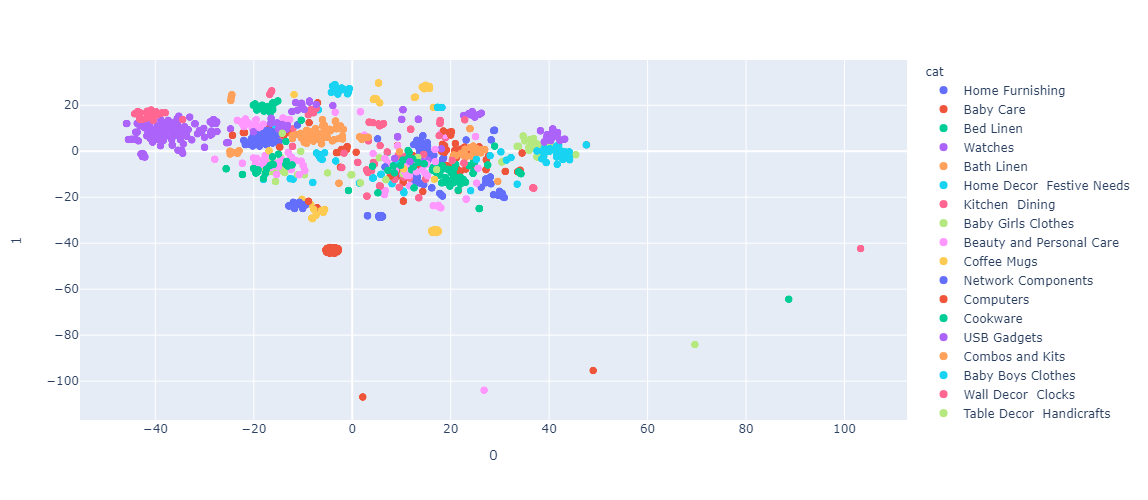

In [91]:
from sklearn.manifold import TSNE
# with plotly
import plotly.express as px

features = word_doc_matrix

tsne = TSNE(n_components=2, random_state=seed)
projections = tsne.fit_transform(features, )

fig = px.scatter(
    projections, x=0, y=1,
    color=data_net.cat, labels={'color': 'cat'}
)

fig.update_layout(
    autosize=False
    , width=800
    , height=500)

fig.update_traces(marker_size=8)
fig.show()

In [92]:
projections[:,1]

array([-18.907995  ,   1.8317274 ,   1.9287903 , ...,   2.0570188 ,
        -0.09323082,   1.4815872 ], dtype=float32)

cat_0 se distigue moins bien que cat. Semble meilleur que TF-IDF

### TF-IDF

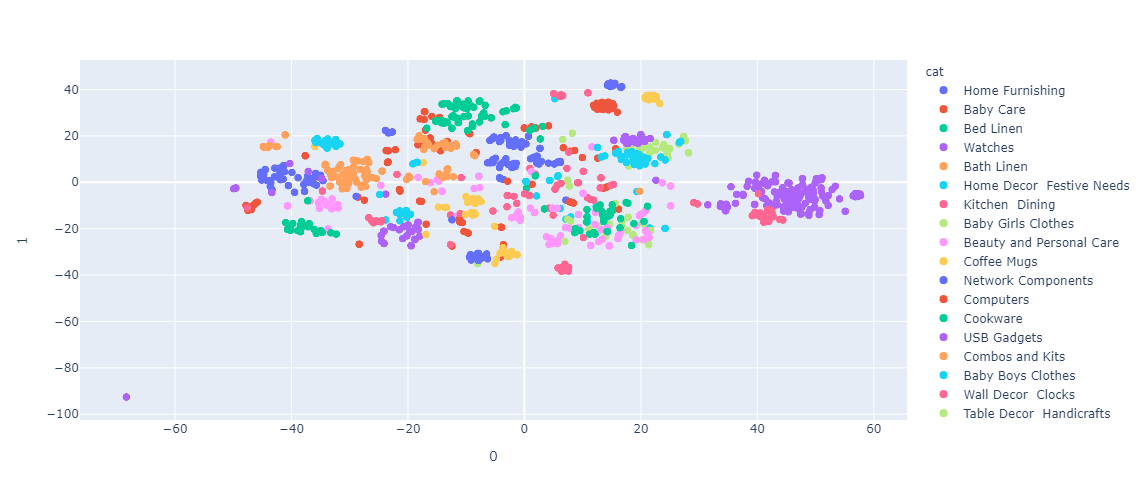

In [93]:
from sklearn.manifold import TSNE
import plotly.express as px

features = tf_idf_matrix

tsne = TSNE(n_components=2, random_state=seed)
projections = tsne.fit_transform(features, )

fig = px.scatter(
    projections, x=0, y=1,
    color=data_net.cat, labels={'color': 'cat'}
)

fig.update_layout(
    autosize=False
    , width=800
    , height=500)

fig.update_traces(marker_size=8)
fig.show()

moins bon que word count, Cat_0 pire que cat

### word2vec custom

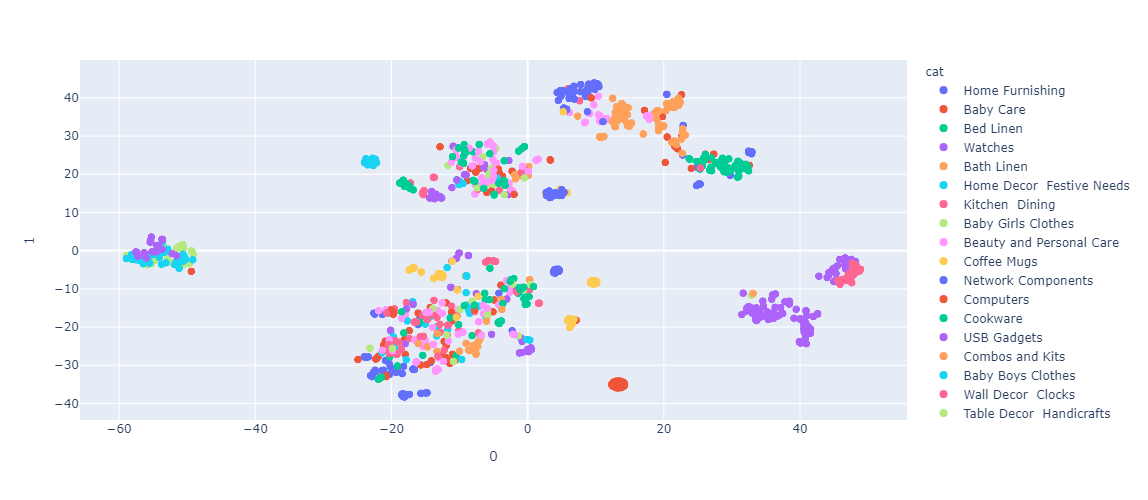

In [94]:
from sklearn.manifold import TSNE
import plotly.express as px

features = docs_embedded_w2v[w2v_coor_cols]

tsne = TSNE(n_components=2, random_state=seed)
projections = tsne.fit_transform(features, )

fig = px.scatter(
    projections, x=0, y=1,
    color=data_net.cat, labels={'color': 'cat'}
)

fig.update_layout(
    autosize=False
    , width=800
    , height=500)

fig.update_traces(marker_size=8)
fig.show()

cat se distingue plus ou moins bien selon les catégories. De même pour cat_0. Cat_0 se distingue miuex que cat

### TF USE

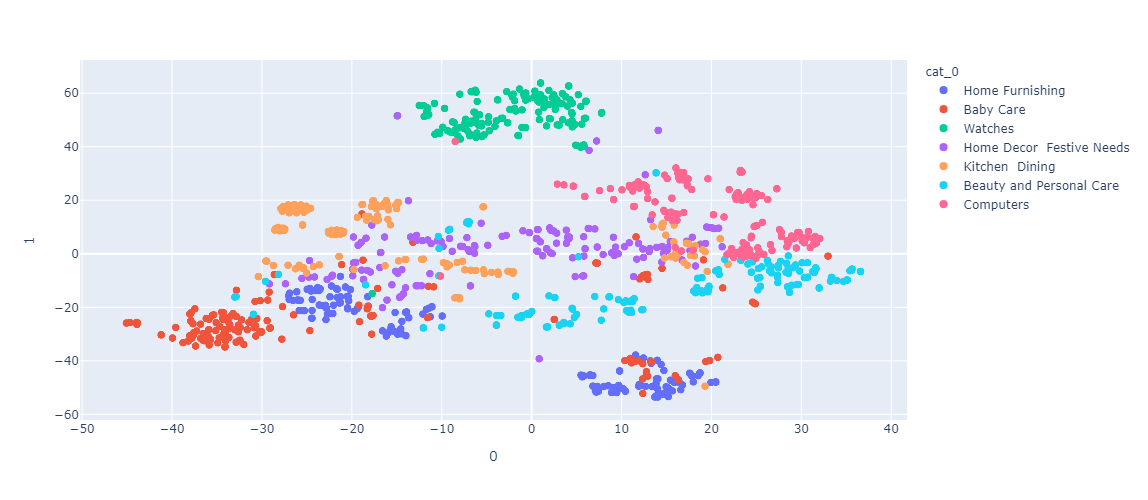

In [95]:
from sklearn.manifold import TSNE
import plotly.express as px

features = use_embeddings

tsne = TSNE(n_components=2, random_state=seed)
projections = tsne.fit_transform(features, )

fig = px.scatter(
    projections, x=0, y=1,
    color=data_net.cat_0, labels={'color': 'cat_0'}
)

fig.update_layout(
    autosize=False
    , width=800
    , height=500)

fig.update_traces(marker_size=8)
fig.show()

cat_0 se distingue plus ou moins bien selon les catégories. moins bon que w2v on dirait
certaines cat se distinguent très bien

# Clustering

In [96]:
from sklearn.metrics import adjusted_rand_score

## KMean

### Words count

#### cat_0

In [97]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

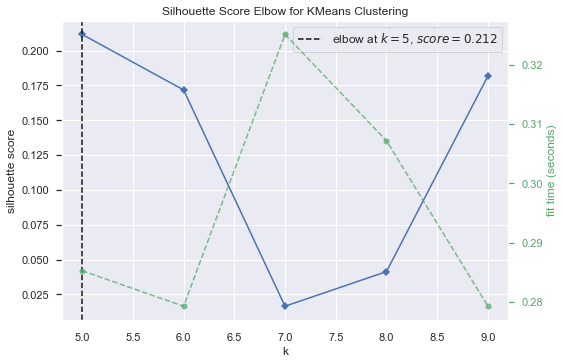

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [98]:
# Instantiate the clustering model and visualizer
sns.set()
model_cat_count = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_count, k=(5,10), metric='silhouette')

visualizer.fit(word_doc_matrix)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [99]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cat_0 = len(data_net['cat_0'].unique())
knn_cat = KMeans(n_cat_0, random_state=seed)
knn_cat.fit(word_doc_matrix)
pd.crosstab(data_net.cat_0, knn_cat.labels_)

col_0                       0    1    2   3   4    5  6
cat_0                                                  
Baby Care                   0    0  114   0   0   36  0
Beauty and Personal Care    0    0   47   1   0  102  0
Computers                   0    0   45   0   0   98  7
Home Decor  Festive Needs   0    0   39  96   0   15  0
Home Furnishing             0    0   76   0   0   74  0
Kitchen  Dining            21    0   54   0  20   55  0
Watches                     0  139   11   0   0    0  0

In [100]:
ARI_scores=[]
data_vs_cat=[]
ARI_scores.append(round(adjusted_rand_score(data_net.cat_0, knn_cat.labels_), 2))
data_vs_cat.append('word_count_cat_0')

kmean retrouve bien cat_0, sauf pour baby care et kitchen & dinning

#### cat

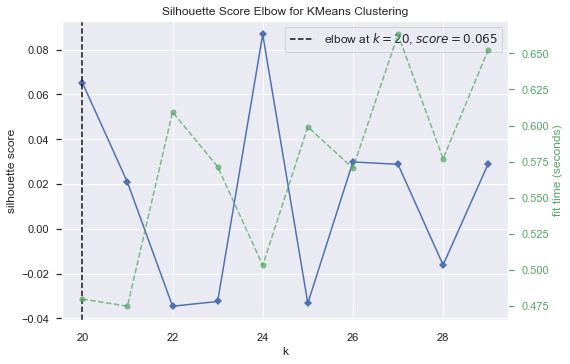

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [101]:
# Instantiate the clustering model and visualizer
model_cat_count = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_count, k=(20, 30), metric='silhouette')

visualizer.fit(word_doc_matrix)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [102]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cats = len(data_net['cat'].unique())
knn_cat = KMeans(n_cats, random_state=seed)
knn_cat.fit(word_doc_matrix)
pd.crosstab(data_net.cat, knn_cat.labels_)

col_0                      0   1   2   3   4   5   6   7   8   9   10  11  12  \
cat                                                                             
Baby Boys Clothes           0   0   0   0   0   0   0  30   0   0   0   0   3   
Baby Care                   0  20   2   0  14   0   0   2   0   0   0   0  26   
Baby Girls Clothes          0   0   0   0   0   0   0  10   0   0   0   0   7   
Bath Linen                  0   9   0   0   0   0   0   0   0   0   0   0  12   
Batteries                   0  17   0   0   1   0   0   0   0   0   0   0   0   
Beauty and Personal Care    0  18   0   0   7   0   0   0   0   0   6   0  29   
Bed Linen                   0  48   3   0   0   0   0   0   0   0   0   0  13   
Coffee Mugs                10   0   0   0   3   0   0   0   0   0   0   0   1   
Combos and Kits             0   0   0   0  14   0   0   0   0   0   0   0  10   
Computers                   0   2   0   0   2   0   0   0   0   0   0   0  10   
Cookware                    0   0   0   0  18   0   0   0   0   0   0   0   9   
Dresses  Skirts             0   0   0   0   0   0   0   2   0   0   0   0   1   
Ethnic                      0   0   0   0  22   0   0   0   0   0   0   0  12   
Fragrances                  0  62   0   0   0   0   0   0   0   0   0   0   3   
Home Decor  Festive Needs   0   0   0   0   7   0   0   0   0   2   0   0  20   
Home Furnishing             0  17   0   0   0   0   0   5   0   0   0   0  42   
Kitchen  Dining             0   3   0   0  11   0   0   0   0   0   0   0  33   
Laptop Accessories          0   1   0   7   1   0   0   0   0   0   0   0   4   
Maxima Wrist Watches        0   0   0   0   0   0   0   0   0   0   0   0   0   
Network Components          0  48   0   0   0   0   0   0   0   0   0   0   1   
Prithish Coffee Mugs        0   0   0   0  15   3   8   0   0   0   0   0   0   
Rockmantra Coffee Mugs      0   0   0   0   1   0   0   0  21   0   0   0   0   
Showpieces                  0   0   0   0  27   0   0   0   0   0   0   0  10   
Table Decor  Handicrafts    0   0   0   0  17   0   0   0   0   0   0   0  10   
USB Gadgets                 0   0   0   0  23   0   0   0   0   0   0   0  15   
Wall Decor  Clocks          0   0   0   0   5   0   0   0   0   0   0   2  12   
Watches                     0   0   0   0   0   0   0   0   0   0   0   0  11   

col_0                      13  14  15  16  17   18  19  20  21  22  23  24  \
cat                                                                          
Baby Boys Clothes           0   0   0   0   0    0   0   0   0   0   0   0   
Baby Care                   0   2   0   0   0    0   0   0   0   0   0   0   
Baby Girls Clothes          0   0   0   0   0    0   0   0   0   0   0   0   
Bath Linen                  0   0   0   0   0    0   0   0   0   0   0   0   
Batteries                   0   0   0   0   0    0   0   0   0   0   0   4   
Beauty and Personal Care    0   0   0   0   0    0   1   0   0   0   0   0   
Bed Linen                   0   0   0   0   0    0   0   1   0   0   0   0   
Coffee Mugs                 0   0   0   0   0    0   0   0   0   0  12   0   
Combos and Kits             0   0   0   0   0    0   0   0   0   0   0   0   
Computers                   0   0   0   0   0    0   0   0   0   0   0   0   
Cookware                    0   0   0   0   0    0   0   0   0   0   0   0   
Dresses  Skirts             9   0   0   0   0    0   0   0   0   0   0   0   
Ethnic                      0   0   0   0   0    0   0   0   0   0   0   0   
Fragrances                  0   0   0   0   0    0   0   0   0   0   0   0   
Home Decor  Festive Needs   0   0   0   0   0    0   0   0   0   1   0   0   
Home Furnishing             0   0   0   0   0    0   0   0   0   0   0   0   
Kitchen  Dining             0   0   1   0   0    0   0   0   0   0   0   0   
Laptop Accessories          0   0   0   3  10    0   0   0   0   0   0   1   
Maxima Wrist Watches        0   0   0   0   0   23   0   0   0   0   0   0   
Network Comp

Meilleur que tf-idf

In [103]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat, knn_cat.labels_), 2))
data_vs_cat.append('word_count_cat')

In [104]:
len(data_net.cat.unique())
# len(data_net.cat_0.unique())

27

### TF-IDF

#### no min max df

##### cat_0

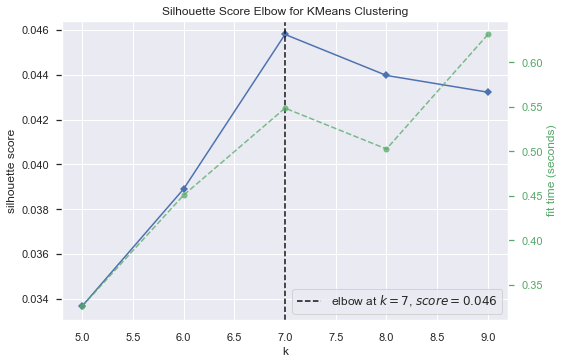

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [105]:
# Instantiate the clustering model and visualizer
model_cat_count = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_count, k=(5,10), metric='silhouette')

visualizer.fit(tf_idf_matrix)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [106]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cat_0 = len(data_net['cat_0'].unique())
knn_cat = KMeans(n_cat_0, random_state=seed)
knn_cat.fit(tf_idf_matrix)
pd.crosstab(data_net.cat_0, knn_cat.labels_)

col_0                       0   1   2   3   4    5    6
cat_0                                                  
Baby Care                  20  79   1   0   0   50    0
Beauty and Personal Care   80   0   0   0   0   70    0
Computers                  68   0   7   0   0   75    0
Home Decor  Festive Needs   0   0   0   0   0  150    0
Home Furnishing            74   0   0   0   0   76    0
Kitchen  Dining             3   0  30  33  11   73    0
Watches                     0   0   0   0   0    6  144

cat_0 est répartie sur plusieurs clusters, kmean retrouve mal les cat_0. Contrairement à word_count

In [107]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat_0, knn_cat.labels_), 2))
data_vs_cat.append('tf-idf_cat_0')

##### cat

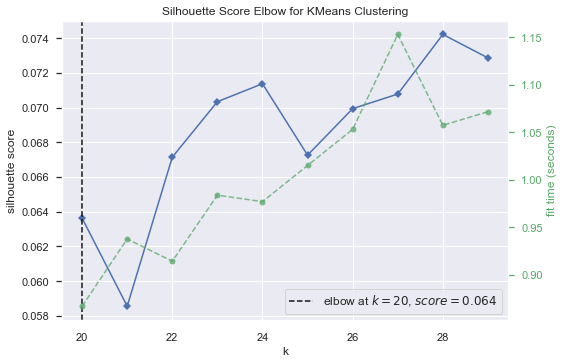

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [108]:
# Instantiate the clustering model and visualizer
model_cat_count = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_count, k=(20, 30), metric='silhouette')

visualizer.fit(tf_idf_matrix)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [109]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cats = len(data_net['cat'].unique())
knn_cat = KMeans(n_cats, random_state=seed)
knn_cat.fit(tf_idf_matrix)
# pd.crosstab(data_net.cat, knn_cat.labels_)

KMeans(n_clusters=27, random_state=7)

De nombreuses catégories sont présentes en nombre sur plusieurs clusters

In [110]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat, knn_cat.labels_), 2))
data_vs_cat.append('tf-idf_cat')

In [111]:
len(data_net.cat.unique())
len(data_net.cat_0.unique())

7

In [112]:
ARI_scores

[0.21, 0.21, 0.22, 0.33]

#### min_df=5 max=0.8

##### cat_0

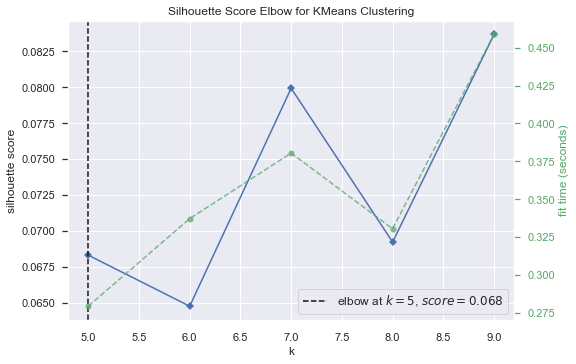

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [113]:
# Instantiate the clustering model and visualizer
model_cat_count = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_count, k=(5,10), metric='silhouette')

visualizer.fit(tf_idf_508_matrix)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [114]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cat_0 = len(data_net['cat_0'].unique())
knn_cat = KMeans(n_cat_0, random_state=seed)
knn_cat.fit(tf_idf_508_matrix)
pd.crosstab(data_net.cat_0, knn_cat.labels_)

col_0                       0    1   2   3   4   5   6
cat_0                                                 
Baby Care                  12    0   1  81  14  31  11
Beauty and Personal Care   80    0   0   0  21  49   0
Computers                  68    0   0   0  25  57   0
Home Decor  Festive Needs   0    0   0   0  77  73   0
Home Furnishing            65    0   0   0   0  65  20
Kitchen  Dining             3    0  74   0  29  44   0
Watches                     0  141   0   0   0   9   0

cat_0 est répartie sur plusieurs clusters, kmean retrouve mal les cat_0. Contrairement à word_count

In [115]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat_0, knn_cat.labels_), 2))
data_vs_cat.append('tf-idf_508_cat_0')

##### cat

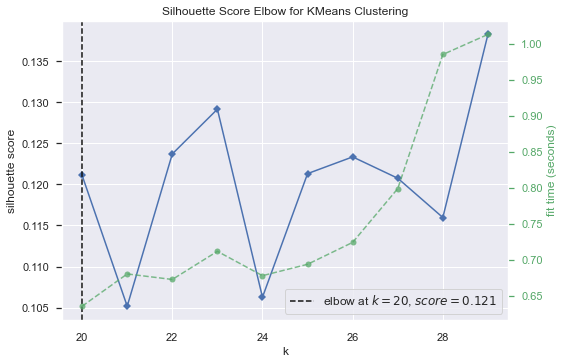

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [116]:
# Instantiate the clustering model and visualizer
model_cat_count = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_count, k=(20, 30), metric='silhouette')

visualizer.fit(tf_idf_508_matrix)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [117]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cats = len(data_net['cat'].unique())
knn_cat = KMeans(n_cats, random_state=seed)
knn_cat.fit(tf_idf_508_matrix)
# pd.crosstab(data_net.cat, knn_cat.labels_)

KMeans(n_clusters=27, random_state=7)

De nombreuses catégories sont présentes en nombre sur plusieurs clusters

In [118]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat, knn_cat.labels_), 2))
data_vs_cat.append('tf-idf_508_cat')

In [119]:
len(data_net.cat.unique())
len(data_net.cat_0.unique())

7

In [120]:
ARI_scores

[0.21, 0.21, 0.22, 0.33, 0.27, 0.33]

### word2vec custom

#### cat_0

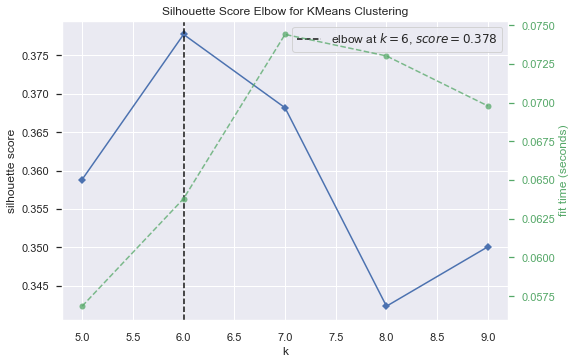

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [121]:
# Instantiate the clustering model and visualizer
model_cat_0_w2v = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_0_w2v, k=(5,10), metric='silhouette')

visualizer.fit(docs_embedded_w2v[w2v_coor_cols])    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Le score silouette est 10 fois meilleurs qu'avec tf_idf ou word_count

In [122]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cat_0 = len(data_net['cat_0'].unique())
knn_cat = KMeans(n_cat_0, random_state=seed)
knn_cat.fit(docs_embedded_w2v[w2v_coor_cols])
pd.crosstab(data_net.cat_0, knn_cat.labels_)

col_0                        0   1   2   3    4   5   6
cat_0                                                  
Baby Care                   34   7  77   0    3   0  29
Beauty and Personal Care   101  17   0   0    1   0  31
Computers                   88  52   0   0    0   0  10
Home Decor  Festive Needs   75  41   0   1    0   0  33
Home Furnishing             73  13   0   0    0   0  64
Kitchen  Dining             50  34   0  23    0  21  22
Watches                      1   3   2   0  141   0   3

cat_0 est répartie sur plusieurs clusters, kmean retrouve mal les cat_0. Contrairement à word_count

In [123]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat_0, knn_cat.labels_), 2))
data_vs_cat.append('w2v_cat_0')

#### cat

In [124]:
# Instantiate the clustering model and visualizer
model_cat_w2v = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_w2v, k=(20, 30), metric='silhouette')

visualizer.fit(docs_embedded_w2v[w2v_coor_cols])    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

Le score silouette est 10 fois meilleurs qu'avec tf_idf ou word_count, similaie à cat_0

In [125]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cats = len(data_net['cat'].unique())
knn_cat = KMeans(n_cats, random_state=seed)
knn_cat.fit(docs_embedded_w2v[w2v_coor_cols])
# pd.crosstab(data_net.cat, knn_cat.labels_)

KMeans(n_clusters=27, random_state=7)

De nombreuses catégories sont présentes en nombre sur plusieurs clusters

In [126]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat, knn_cat.labels_), 2))
data_vs_cat.append('w2v_cat')

### tf use

#### cat_0

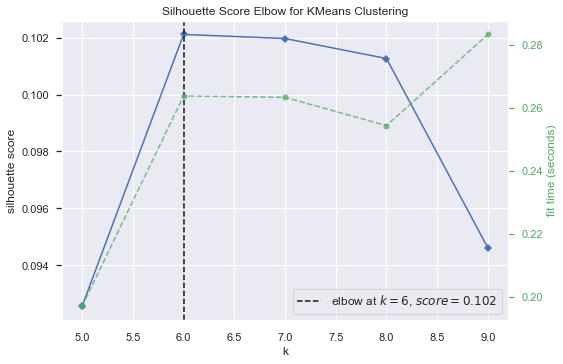

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [127]:
# Instantiate the clustering model and visualizer
model_cat_0_use = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_0_use, k=(5,10), metric='silhouette')

visualizer.fit(use_embeddings)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Le score silouette est meilleur qu'avec word count ou tf-idf mais moins bon que w2v

In [128]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cat_0 = len(data_net['cat_0'].unique())
knn_cat = KMeans(n_cat_0, random_state=seed)
knn_cat.fit(use_embeddings)
pd.crosstab(data_net.cat_0, knn_cat.labels_)

col_0                       0   1   2   3    4   5   6
cat_0                                                 
Baby Care                  18   1  83   0    0  16  32
Beauty and Personal Care   95   0   0   2    0   0  53
Computers                  62   0   0  72    0   0  16
Home Decor  Festive Needs  72   1   0   1    0   0  76
Home Furnishing             0   0   1   0    0  74  75
Kitchen  Dining            30  74   0   0    0   1  45
Watches                     6   0   0   0  139   0   5

In [129]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat_0, knn_cat.labels_), 2))
data_vs_cat.append('use_cat_0')

#### cat

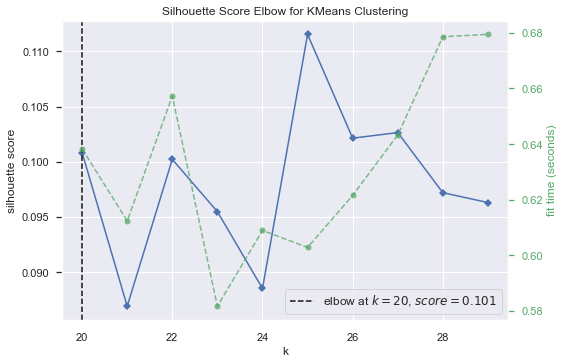

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [130]:
# Instantiate the clustering model and visualizer
model_cat_use = KMeans(random_state=seed)
visualizer = KElbowVisualizer(model_cat_use, k=(20, 30), metric='silhouette')

visualizer.fit(use_embeddings)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Le score silouette est meilleur qu'avec word count ou tf-idf mais moins bon que w2v

In [131]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cats = len(data_net['cat'].unique())
knn_cat = KMeans(n_cats, random_state=seed)
knn_cat.fit(use_embeddings)
# pd.crosstab(data_net.cat, knn_cat.labels_)

KMeans(n_clusters=27, random_state=7)

De nombreuses catégories sont présentes en nombre sur plusieurs clusters

In [132]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat, knn_cat.labels_), 2))
data_vs_cat.append('use_cat')

## ARI-scores

In [133]:
ARI_final = dict(zip(data_vs_cat, ARI_scores))

In [134]:
ARI_final

{'word_count_cat_0': 0.21,
 'word_count_cat': 0.21,
 'tf-idf_cat_0': 0.22,
 'tf-idf_cat': 0.33,
 'tf-idf_508_cat_0': 0.27,
 'tf-idf_508_cat': 0.33,
 'w2v_cat_0': 0.19,
 'w2v_cat': 0.39,
 'use_cat_0': 0.31,
 'use_cat': 0.37}

Text(0.5, 1.0, 'ARI_score')

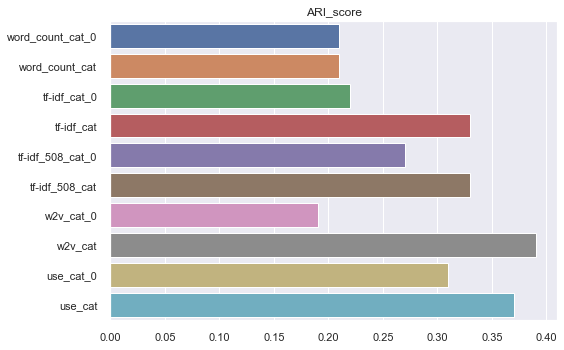

In [135]:
sns.barplot(x=ARI_scores, y=data_vs_cat)
plt.title('ARI_score')

Pas assez de mots pour W2V, W2V pas idéal pour vectoriser des phrases et des descriptions

## Visualisation d'images et de leur cluster

### tf-idf_cat

In [136]:
"""fig = plt.figure(figsize=(14, 14))

images = [file for file in os.listdir(os.getcwd())]

for cnt, data in enumerate(images[1:30]):
#     print(data)
    y = fig.add_subplot(6, 5, cnt+1)
    img = mpimg.imread(cluster_path+data)
    y.imshow(img)
    plt.title('cluster_5')
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)"""

"fig = plt.figure(figsize=(14, 14))\n\nimages = [file for file in os.listdir(os.getcwd())]\n\nfor cnt, data in enumerate(images[1:30]):\n#     print(data)\n    y = fig.add_subplot(6, 5, cnt+1)\n    img = mpimg.imread(cluster_path+data)\n    y.imshow(img)\n    plt.title('cluster_5')\n    y.axes.get_xaxis().set_visible(False)\n    y.axes.get_yaxis().set_visible(False)"

## pickling ARI

In [137]:
# On sauvegarde les variables
list_objects = [
             ARI_scores
            , data_vs_cat
               ]

with open("D:/Dowloads_D/Data_OC/P6/dump_ARI", 'wb') as fic:
    mon_pickler = pickle.Pickler(fic)
    mon_pickler.dump(list_objects)

# Classification

## test/train split & Kfold

In [138]:
from sklearn.model_selection import KFold

In [139]:
n_splits = 5 # number of folds
kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
# we make the train test split for cat_0 and cat for word_counts
word_count_train, word_count_test, cat_train, cat_test = train_test_split(word_doc_matrix, data_net[['cat_0', 'cat']], test_size=0.2, random_state=seed)

In [142]:
# we make the train test split for cat_0 and cat for tf-if
tf_idf_train, tf_idf_test, *_ = train_test_split(tf_idf_matrix, data_net[['cat_0', 'cat']], test_size=0.2, random_state=seed)

## KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [144]:
from sklearn.model_selection import GridSearchCV

scoring = 'accuracy'

n_neighbors = list(range(2,10))

param_grid = {'n_neighbors': n_neighbors}

data_X_train = {'word_count': word_count_train, 'tf_idf':tf_idf_train}
data_y_train = {'cat_0':cat_train.iloc[: ,0], 'cat':cat_train.iloc[: ,1]}
data_X_test = {'word_count':word_count_test, 'tf_idf':tf_idf_test}
data_y_test = {'cat_0':cat_test.iloc[: ,0], 'cat':cat_test.iloc[: ,1]}

In [145]:
for (X_train_name, X_train), (X_test_name, X_test) in zip(data_X_train.items(), data_X_test.items()):
    for (y_train_name, y_train), (y_test_name, y_test) in zip(data_y_train.items(), data_y_test.items()):

        # Use the search grid to search for best hyperparameters
        # First create the base model to tune
        KnnClf = KNeighborsClassifier()
        # Grid search of parameters, using K fold cross validation, 
        # search across 100 different combinations, and use all available cores
        knn_grid = GridSearchCV(estimator = KnnClf, param_grid = param_grid, cv = kfold, scoring=scoring, return_train_score=True)
        # Fit the random search model
        knn_grid.fit(X_train, y_train)
        # Model Performance
        print('X_train: ',X_train_name, ' X_test: ', y_train_name, ' y_train: ', y_train_name, ' y_test: ', y_test_name, ' best params: ',knn_grid.best_params_, 'accuracy_score on test: ', '{:.2%}'.format(accuracy_score(y_test, knn_grid.best_estimator_.predict(X_test))))

X_train:  word_count  X_test:  cat_0  y_train:  cat_0  y_test:  cat_0  best params:  {'n_neighbors': 3} accuracy_score on test:  80.95%
X_train:  word_count  X_test:  cat  y_train:  cat  y_test:  cat  best params:  {'n_neighbors': 4} accuracy_score on test:  72.38%
X_train:  tf_idf  X_test:  cat_0  y_train:  cat_0  y_test:  cat_0  best params:  {'n_neighbors': 3} accuracy_score on test:  90.00%
X_train:  tf_idf  X_test:  cat  y_train:  cat  y_test:  cat  best params:  {'n_neighbors': 3} accuracy_score on test:  78.10%


# Traitement des images  

In [146]:
# on récupère le dataset contenant les classes et les noms d'images
# on récupère également la matrice tf-idf afin d'y concaténer les meilleurs features des images 
# dans la partie Clustering NLP + CV

with open("D:/Dowloads_D/Data_OC/P6/dump", 'rb') as fic:
    mon_depickler = pickle.Unpickler(fic)
    loaded = mon_depickler.load()

data_cats, data_net, tf_idf_matrix = loaded

# on récupère maintenant les ARI_scores de la partie NLP
with open("D:/Dowloads_D/Data_OC/P6/dump_ARI", 'rb') as fic:
    mon_depickler = pickle.Unpickler(fic)
    loaded = mon_depickler.load()

ARI_scores, data_vs_cat = loaded

In [147]:
from os import listdir

path = "D:\\Dowloads_D\\Data_OC\\P6\\Dataset+projet+prétraitement+textes+images\\Flipkart\\Images\\"
photos = pd.Series([file for file in listdir(path)], name='image')
print(len(photos))

1050


In [148]:
photos[:3].values

array(['009099b1f6e1e8f893ec29a7023153c4.jpg',
       '0096e89cc25a8b96fb9808716406fe94.jpg',
       '00cbbc837d340fa163d11e169fbdb952.jpg'], dtype=object)

In [149]:
data_cats[['image', 'cat_0', 'cat']].head()

image            cat_0              cat
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing  Home Furnishing
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care        Baby Care
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care        Baby Care
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing        Bed Linen
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing        Bed Linen

In [150]:
data_i_raw = pd.merge(data_cats[['image', 'cat_0', 'cat']], photos, on=['image'])

In [151]:
data_cats['image']

0       55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       7b72c92c2f6c40268628ec5f14c6d590.jpg
2       64d5d4a258243731dc7bbb1eef49ad74.jpg
3       d4684dcdc759dd9cdf41504698d737d8.jpg
4       6325b6870c54cd47be6ebfbffa620ec7.jpg
                        ...                 
1045    958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    fd6cbcc22efb6b761bd564c28928483c.jpg
1047    5912e037d12774bb73a2048f35a00009.jpg
1048    c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    f2f027ad6a6df617c9f125173da71e44.jpg
Name: image, Length: 1050, dtype: object

In [152]:
data_i_raw.head()

image            cat_0              cat
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing  Home Furnishing
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care        Baby Care
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care        Baby Care
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing        Bed Linen
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing        Bed Linen

In [153]:
data_cats['cat_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor  Festive Needs', 'Kitchen  Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

Home Furnishing
55b85ea15a1536d46b7190ad6fff8ce7.jpg
d4684dcdc759dd9cdf41504698d737d8.jpg
6325b6870c54cd47be6ebfbffa620ec7.jpg


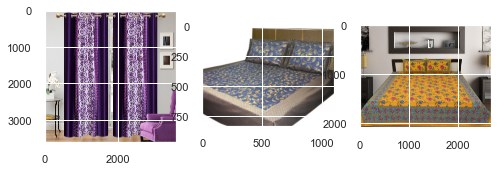

Baby Care
7b72c92c2f6c40268628ec5f14c6d590.jpg
64d5d4a258243731dc7bbb1eef49ad74.jpg
90e56526f4c5892beac49f262b85150a.jpg


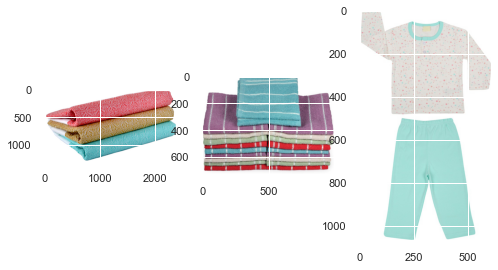

In [154]:
from matplotlib.image import imread

for name in data_cats['cat_0'].unique()[:2] :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(131 + i)
        filename = path + data_cats.loc[data_cats['cat_0'] == name, 'image'].values[i]
        image = plt.imread(filename)
        print(data_cats.loc[data_cats['cat_0'] == name, 'image'].values[i])
        plt.imshow(image)
    plt.show()

In [155]:
"""img = cv2.imread("55b85ea15a1536d46b7190ad6fff8ce7.jpg")
cv2.namedWindow("preview")
cv2.imshow("preview", img)
cv2.waitKey()"""

'img = cv2.imread("55b85ea15a1536d46b7190ad6fff8ce7.jpg")\ncv2.namedWindow("preview")\ncv2.imshow("preview", img)\ncv2.waitKey()'

In [156]:
# cv2_imshow("55b85ea15a1536d46b7190ad6fff8ce7.jpg",'test')

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [157]:
# for cv2.imread to read jpeg, the folder with images must be set as the cwd
os.chdir(path)

In [158]:
# identification of key points and associated descriptors
import time, cv2
orb_keypoints = []
temps1=time.time()
orb=cv2.ORB_create()

for image_num in range(len(photos)) :
    if image_num%100 == 0 : 
        print(image_num)
        
    image = cv2.imread(photos[image_num],0) # flag '0' convert in gray
    # ajouter path + avant image si DIR ne renvoie pas vers le dossier de photos
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(res, None)
    orb_keypoints.append(des)
    # if image_num%100 == 0 : 
        # print(des[:2])
        

orb_keypoints_by_img = np.asarray(orb_keypoints)
orb_keypoints_all    = np.concatenate(orb_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", orb_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :            96.12 secondes


C:\Users\VP\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



## Affichage de quelques descripteurs sur leur image

In [159]:
[random.randrange(10, 1000) for i in range(4)]

[224, 995, 968, 418]

In [160]:
sns.set()

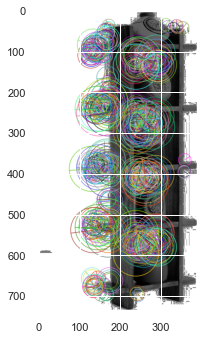

Descripteurs :  (500, 32)


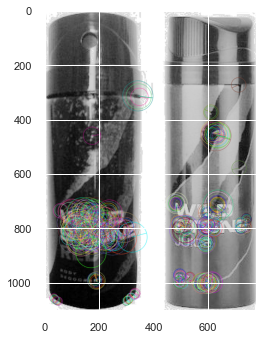

Descripteurs :  (500, 32)


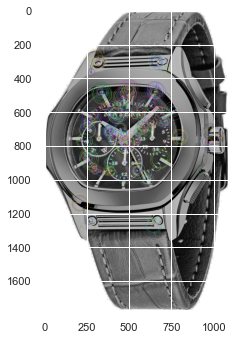

Descripteurs :  (500, 32)


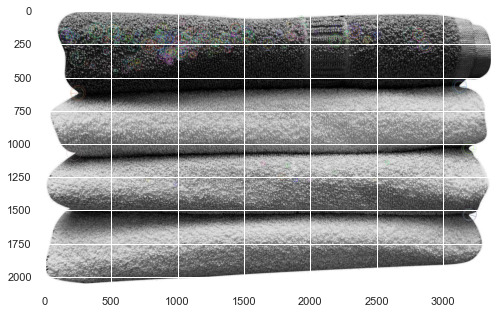

Descripteurs :  (500, 32)


In [161]:
orb = cv2.ORB_create()

for img_num in [244, 964, 571, 309]:
    image = cv2.imread(photos[img_num],0)
    image = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(image, None)
    # print(image.shape) # check that image is found
    img=cv2.drawKeypoints(image
                          ,kp
                          ,image 
                          , flags=4 # 4 make the keypoints obvious
                         )
    plt.imshow(img)
    plt.show()
    print("Descripteurs : ", des.shape)
    # print()
    # print(des)

## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [162]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(orb_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(orb_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")


Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...


C:\Users\VP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1



temps de traitement kmeans :             4.22 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [163]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(orb_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             2.76 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [164]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 721)
Dimensions dataset après réduction PCA :  (1050, 415)


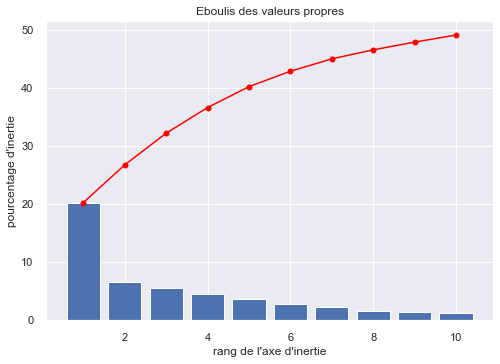

In [165]:
# screeplot
scree = pca.explained_variance_ratio_[:10]*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Analyse mesures : similarité entre catégories et clusters avant t-SNE

In [166]:
from sklearn import cluster, metrics

for cat in ['cat_0', 'cat']:
    cls = cluster.KMeans(n_clusters=len(data_cats[cat].unique()), random_state=seed)
    cls.fit(feat_pca)
    
    print("ARI {}: ".format(cat), metrics.adjusted_rand_score(data_cats[cat], cls.labels_))

ARI cat_0:  -0.0003920547673962386
ARI cat:  -0.0012994679862828268


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [167]:
from sklearn import manifold, decomposition

dfs_tsne = dict()
for perp in [30, 35]: # range(5,50,5):
    tsne = manifold.TSNE(n_components=2, perplexity=perp, 
                         n_iter=2000, init='random', random_state=seed)
    X_tsne = tsne.fit_transform(feat_pca)

    df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
    df_tsne["cat_0"] = data_cats["cat_0"]
    df_tsne["cat"] = data_cats["cat"]
    dfs_tsne['df_tsne_{}'.format(perp)] = df_tsne

## Analyse visuelle : affichage T-SNE selon catégories d'images
* Les catégories "cloudy" et "rain" sont partiellement séparées

In [168]:
sns.set()

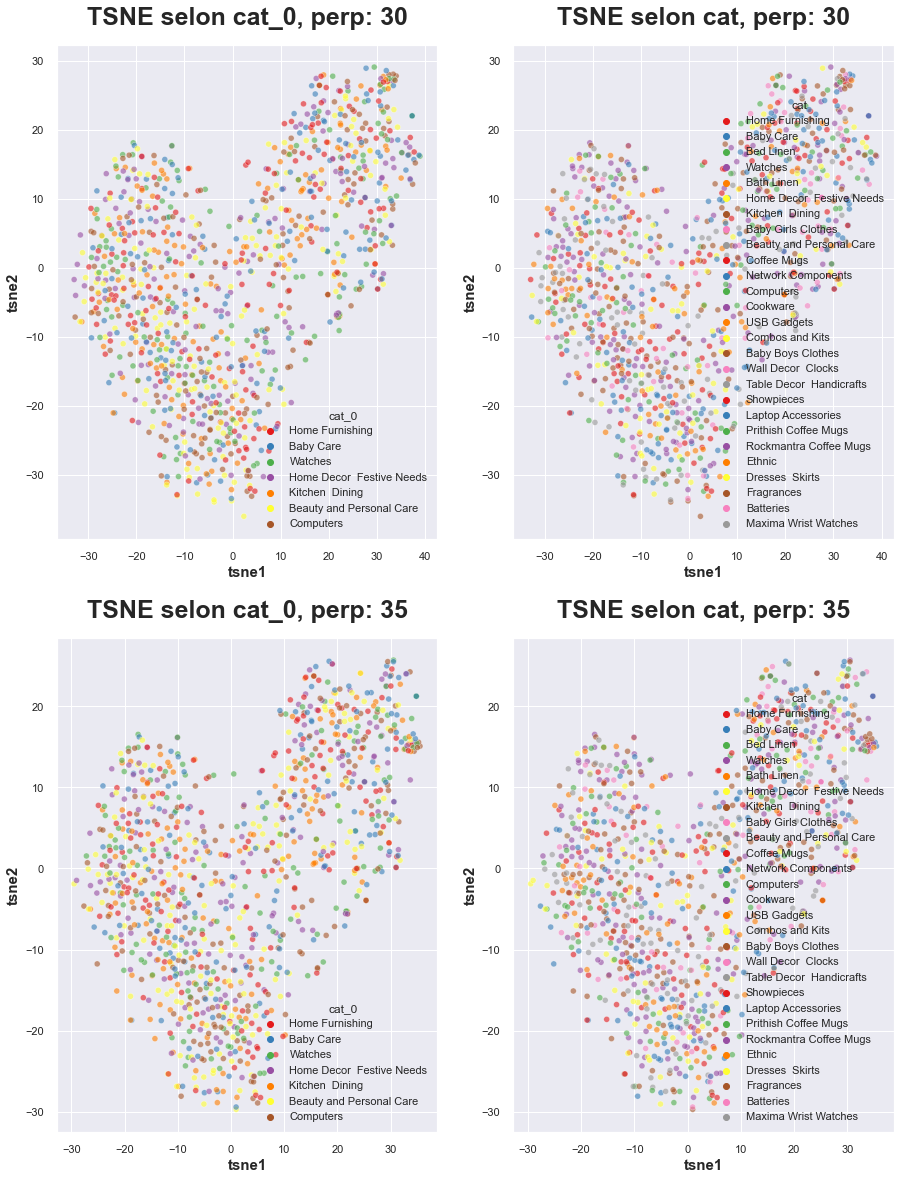

In [169]:
fig, axes = plt.subplots(len(dfs_tsne.keys()), 2, figsize=(15,10*len(dfs_tsne.keys())))
for i, (name, df_tsne) in enumerate(dfs_tsne.items()):
    for j, cat in enumerate(['cat_0', 'cat']):
        sns.scatterplot(
            x="tsne1", y="tsne2", hue=cat, data=df_tsne, ax=axes[i,j],
            palette=sns.color_palette('Set1', n_colors=len(data_cats[cat].unique())), alpha=0.6)

        axes[i,j].set_title('TSNE selon {}, perp: {}'.format(cat, name[-2:]), fontsize = 25, pad = 20, fontweight = 'bold')
        axes[i,j].set_xlabel('tsne1', fontsize = 15, fontweight = 'bold')
        axes[i,j].set_ylabel('tsne2', fontsize = 15, fontweight = 'bold')
        # plt.legend(prop={'size': 14}) 


La forme varie le moins autour d'une perplexité de 30. On va donc sélectionner une perpléxité de 30

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [170]:
df_tsne = dfs_tsne['df_tsne_30']
X_tsne = dfs_tsne['df_tsne_30'][['tsne1', 'tsne2']].values

In [171]:
from sklearn import cluster, metrics

for cat in ['cat_0', 'cat']:
    cls = cluster.KMeans(n_clusters=len(data_cats[cat].unique()), random_state=seed)
    cls.fit(X_tsne)

    df_tsne["cluster_{}".format(cat)] = cls.labels_
    print(df_tsne.shape)


(1050, 5)
(1050, 6)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.15 reste faible

ARI cat_0:  0.00031672290115511957
ARI cat:  -0.0005062962232327731


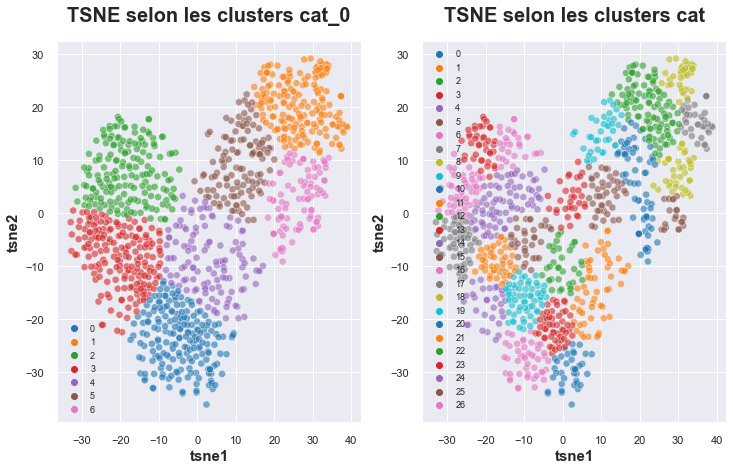

In [172]:
plt.figure(figsize=(12,7))

for i,cat in enumerate(['cat_0', 'cat']):
    plt.subplot(121+i)
    sns.scatterplot(
        x="tsne1", y="tsne2",
        hue="cluster_{}".format(cat),
        palette=sns.color_palette('tab10', n_colors=len(data_cats[cat].unique())), s=50, alpha=0.6,
        data=df_tsne,
        legend="brief")

    plt.title('TSNE selon les clusters {}'.format(cat), fontsize = 20, pad = 20, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
    plt.legend(prop={'size': 9}) 

    print("ARI {}: ".format(cat), metrics.adjusted_rand_score(df_tsne[cat], df_tsne["cluster_{}".format(cat)]))

### Analyse par classe

<AxesSubplot:xlabel='cluster_cat_0', ylabel='cat_0'>

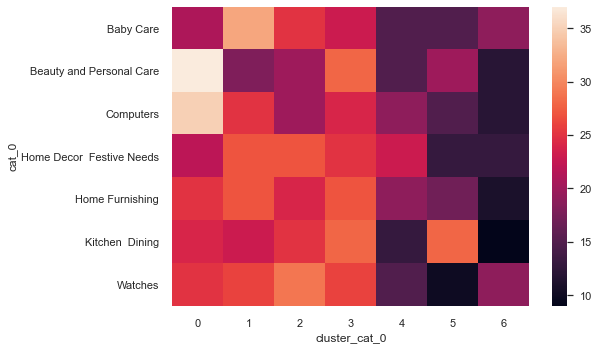

In [173]:
# cat_0
sns.heatmap(pd.crosstab(df_tsne['cat_0'], df_tsne["cluster_cat_0"]))

<AxesSubplot:xlabel='cluster_cat', ylabel='cat'>

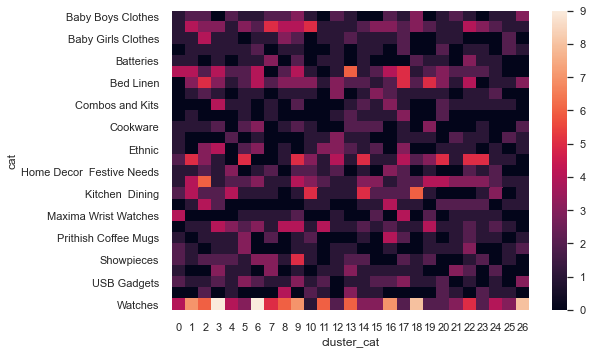

In [174]:
# cat_0
sns.heatmap(pd.crosstab(df_tsne['cat'], df_tsne["cluster_cat"]))

la heatmap confirme visuellement l'ARI score faible

Conclusion: garder la première composante principale, faire des traitements d'images ?

# Clustering des features nlp + CV

## tf_idf_cat + PC des images

In [175]:
import scipy.sparse

In [176]:
def matrix_to_sparse(matrix):
    
    sparse_matrix=[]
    #Search non-zero elements
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]!=0:
                #temporary list
                temp=[]
                temp.append(i)
                temp.append(j)
                temp.append(matrix[i][j])
                sparse_matrix.append(temp)
    #returning final sparse matrix list
    return sparse_matrix

In [177]:
PCA_CV_1_2_sparse = matrix_to_sparse(feat_pca[:, 1:2])

In [178]:
tf_idf_matrix_pca = scipy.sparse.hstack((tf_idf_matrix, PCA_CV_1_2_sparse))

In [179]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cats = len(data_net['cat'].unique())
knn_cat = KMeans(n_cats, random_state=seed)
knn_cat.fit(tf_idf_matrix_pca)
# pd.crosstab(data_net.cat, knn_cat.labels_)

KMeans(n_clusters=27, random_state=7)

In [180]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat, knn_cat.labels_), 2))
data_vs_cat.append('tf-idf_PCA_CV_cat')

## use cat_0 + PC images

In [181]:
import tensorflow as tf

In [182]:
PCA_CV_1_2_tensor = tf.convert_to_tensor(feat_pca[:, 1:2])
PCA_CV_1_2_tensor = tf.cast(PCA_CV_1_2_tensor, tf.float32)

In [183]:
use_embeddings.dtype

tf.float32

In [184]:
PCA_CV_1_2_tensor.dtype

tf.float32

In [185]:
use_embeddings_pca = tf.concat([use_embeddings, PCA_CV_1_2_tensor], 1)

In [186]:
use_embeddings_pca.shape

TensorShape([1050, 513])

In [187]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cat_0 = len(data_net['cat_0'].unique())
knn_cat = KMeans(n_cat_0, random_state=seed)
knn_cat.fit(use_embeddings_pca)
pd.crosstab(data_net.cat_0, knn_cat.labels_)

col_0                       0   1   2   3    4   5   6
cat_0                                                 
Baby Care                  18   1  83   0    0  16  32
Beauty and Personal Care   95   0   1   2    0   0  52
Computers                  62   0   0  72    0   0  16
Home Decor  Festive Needs  72   1   0   1    0   0  76
Home Furnishing             0   0   1   0    0  74  75
Kitchen  Dining            30  74   0   0    0   1  45
Watches                     6   0   0   0  139   0   5

In [188]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat_0, knn_cat.labels_), 2))
data_vs_cat.append('use_PCA_CV_cat_0')

## ARI-scores NLP + CV

Text(0.5, 1.0, 'ARI_score')

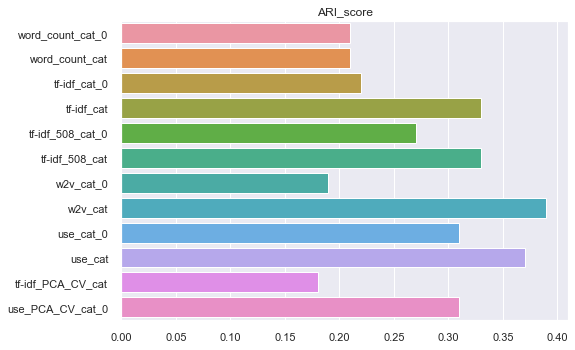

In [189]:
sns.barplot(x=ARI_scores, y=data_vs_cat)
plt.title('ARI_score')

Les composantes principales  décrivent bien les descripteurs mais les descripteurs décrivent mal l'image

# Alternative CNN

## vectorisation des images avec VGG16 et Xception

https://github.com/naikshubham/Image-Clustering-Using-Convnets-Transfer-Learning-and-K-Means-/blob/master/image_clustering.ipynb

In [190]:
import tensorflow as tf

In [191]:
from tensorflow.keras import datasets, layers, models
from keras.models import load_model, Model

from tqdm import tqdm

In [192]:
from keras.applications.vgg16 import VGG16, preprocess_input as vgg16_preprocess_input

In [193]:
# cv2.imread nécessite de définir le dossier du disque D comme wd pour lire des jpeg
os.chdir(path)

In [194]:
def get_model(layer='fc2'):
    """Keras Model of the VGG16 network, with the output layer set to `layer`.
    The default layer is the second-to-last fully connected layer 'fc2' of
    shape (4096,).
    Parameters
    ----------
    layer : str
        which layer to extract (must be of shape (None, X)), e.g. 'fc2', 'fc1'
        or 'flatten'
    """
    # base_model.summary():
    #     ....
    #     block5_conv4 (Conv2D)        (None, 15, 15, 512)       2359808
    #     _________________________________________________________________
    #     block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0
    #     _________________________________________________________________
    #     flatten (Flatten)            (None, 25088)             0
    #     _________________________________________________________________
    #     fc1 (Dense)                  (None, 4096)              102764544
    #     _________________________________________________________________
    #     fc2 (Dense)                  (None, 4096)              16781312
    #     _________________________________________________________________
    #     predictions (Dense)          (None, 1000)              4097000
    #
    base_model = VGG16(weights='imagenet', include_top=True, pooling='avg')
    model = Model(inputs=base_model.input,
                outputs=base_model.get_layer(layer).output)
    return model

In [195]:
# Create Keras NN model.
model = get_model()

In [196]:
from keras.preprocessing import image
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import img_to_array

In [197]:
%%time
# Function to Extract features from the images
def image_feature_extraction(files_names, model, model_preprocess_input):
    """1) upload les images du CWD
       2) les convertit au format idoine pour le model
       3) preprocess les inputs selon le modèle (A IMPORTER AVANT LA FONCTION) """
    features = [];
    img_name = [];

    for file in tqdm(files_names):
        img=image.load_img(file,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=model_preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(file)
    return features,img_name

Wall time: 0 ns


In [198]:
vectors_2, img_names = image_feature_extraction(data_cats['image'], model, vgg16_preprocess_input)

 64%|██████▍   | 677/1050 [03:59<02:07,  2.93it/s]C:\Users\VP\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.

100%|██████████| 1050/1050 [06:12<00:00,  2.82it/s]


vgg162_features, imgs_name = image_feature()

## Analyse mesures : similarité entre catégories et clusters avant PCA

In [199]:
from sklearn import cluster, metrics

for cat in ['cat_0', 'cat']:
    cls = cluster.KMeans(n_clusters=len(data_cats[cat].unique()), random_state=seed)
    cls.fit(vectors_2)
    
    print("ARI {}: ".format(cat), metrics.adjusted_rand_score(data_cats[cat], cls.labels_))

ARI cat_0:  0.4892136554262015
ARI cat:  0.3098672224313101


from sklearn import cluster, metrics

for cat in ['cat_0', 'cat']:
    cls = cluster.KMeans(n_clusters=len(data_cats[cat].unique()), random_state=seed)
    cls.fit(vgg162_features)
    
    print("ARI {}: ".format(cat), metrics.adjusted_rand_score(data_cats[cat], cls.labels_))

## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [200]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", len(vectors_2))
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(vectors_2)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  1050
Dimensions dataset après réduction PCA :  (1050, 803)


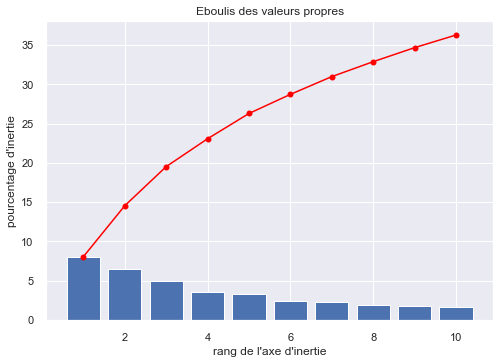

In [201]:
# screeplot
scree = pca.explained_variance_ratio_[:10]*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## Analyse mesures : similarité entre catégories et clusters avant t-SNE

In [202]:
from sklearn import cluster, metrics

for cat in ['cat_0', 'cat']:
    cls = cluster.KMeans(n_clusters=len(data_cats[cat].unique()), random_state=seed)
    cls.fit(feat_pca)
    
    print("ARI {}: ".format(cat), metrics.adjusted_rand_score(data_cats[cat], cls.labels_))

ARI cat_0:  0.4447152115326846
ARI cat:  0.28200211498860217


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [203]:
from sklearn import manifold, decomposition

dfs_tsne = dict()
for perp in [30, 35]: # range(5,50,5):
    tsne = manifold.TSNE(n_components=2, perplexity=perp, 
                         n_iter=2000, init='random', random_state=seed)
    X_tsne = tsne.fit_transform(feat_pca)

    df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
    df_tsne["cat_0"] = data_cats["cat_0"]
    df_tsne["cat"] = data_cats["cat"]
    dfs_tsne['df_tsne_{}'.format(perp)] = df_tsne

## Analyse visuelle : affichage T-SNE selon catégories d'images
* Les catégories "cloudy" et "rain" sont partiellement séparées

In [204]:
sns.set()

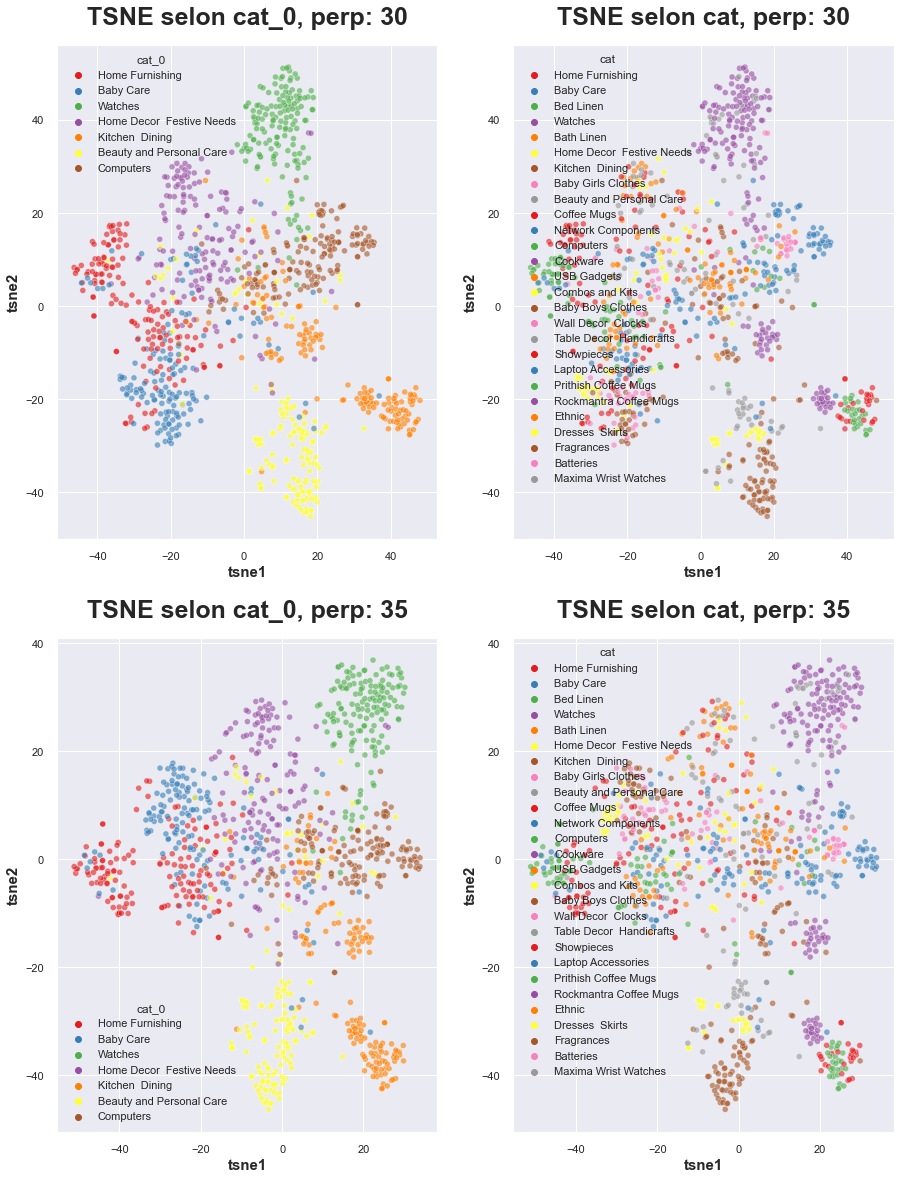

In [205]:
fig, axes = plt.subplots(len(dfs_tsne.keys()), 2, figsize=(15,10*len(dfs_tsne.keys())))
for i, (name, df_tsne) in enumerate(dfs_tsne.items()):
    for j, cat in enumerate(['cat_0', 'cat']):
        sns.scatterplot(
            x="tsne1", y="tsne2", hue=cat, data=df_tsne, ax=axes[i,j],
            palette=sns.color_palette('Set1', n_colors=len(data_cats[cat].unique())), alpha=0.6)

        axes[i,j].set_title('TSNE selon {}, perp: {}'.format(cat, name[-2:]), fontsize = 25, pad = 20, fontweight = 'bold')
        axes[i,j].set_xlabel('tsne1', fontsize = 15, fontweight = 'bold')
        axes[i,j].set_ylabel('tsne2', fontsize = 15, fontweight = 'bold')
        # plt.legend(prop={'size': 14}) 


La forme varie le moins autour d'une perplexité de 30. On va donc sélectionner une perpléxité de 30

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [206]:
df_tsne = dfs_tsne['df_tsne_30']
X_tsne = dfs_tsne['df_tsne_30'][['tsne1', 'tsne2']].values

In [207]:
from sklearn import cluster, metrics

for cat in ['cat_0', 'cat']:
    cls = cluster.KMeans(n_clusters=len(data_cats[cat].unique()), random_state=seed)
    cls.fit(X_tsne)

    df_tsne["cluster_{}".format(cat)] = cls.labels_
    print(df_tsne.shape)


(1050, 5)
(1050, 6)


ARI cat_0:  0.5129027933815911
ARI cat:  0.3180052997502609


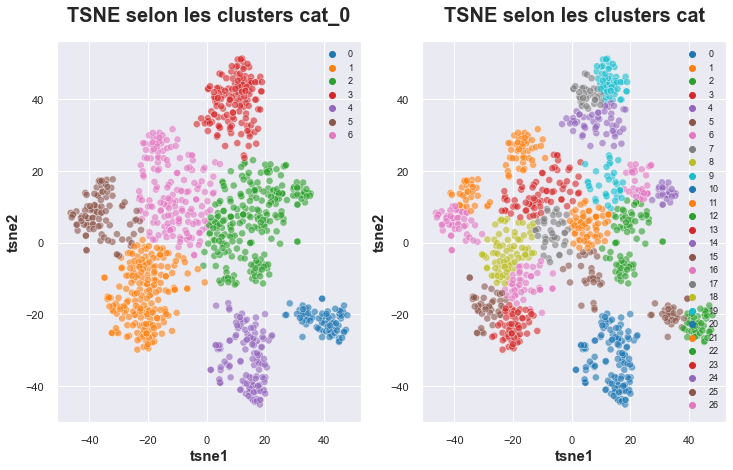

In [208]:
plt.figure(figsize=(12,7))

for i,cat in enumerate(['cat_0', 'cat']):
    plt.subplot(121+i)
    sns.scatterplot(
        x="tsne1", y="tsne2",
        hue="cluster_{}".format(cat),
        palette=sns.color_palette('tab10', n_colors=len(data_cats[cat].unique())), s=50, alpha=0.6,
        data=df_tsne,
        legend="brief")

    plt.title('TSNE selon les clusters {}'.format(cat), fontsize = 20, pad = 20, fontweight = 'bold')
    plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
    plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
    plt.legend(prop={'size': 9}) 

    print("ARI {}: ".format(cat), metrics.adjusted_rand_score(df_tsne[cat], df_tsne["cluster_{}".format(cat)]))

### Analyse par classe

<AxesSubplot:xlabel='cluster_cat_0', ylabel='cat_0'>

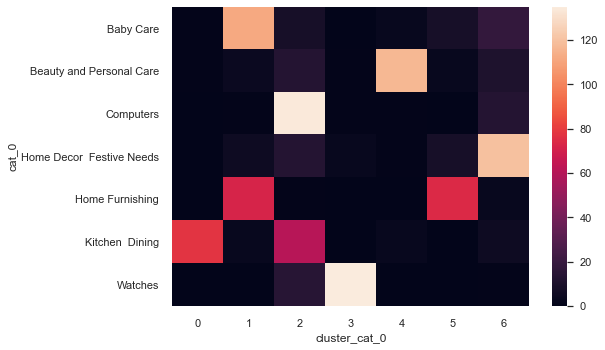

In [209]:
# cat_0
sns.heatmap(pd.crosstab(df_tsne['cat_0'], df_tsne["cluster_cat_0"]))

<AxesSubplot:xlabel='cluster_cat', ylabel='cat'>

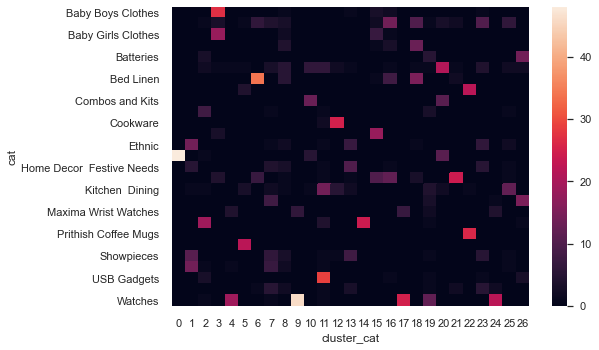

In [210]:
# cat_0
sns.heatmap(pd.crosstab(df_tsne['cat'], df_tsne["cluster_cat"]))

la heatmap confirme visuellement l'ARI score faible

Conclusion: garder la première composante principale, faire des traitements d'images ?

# Clustering des features nlp + CNN

## tf_idf_cat + PC CNN des images

In [211]:
import scipy.sparse

In [212]:
def matrix_to_sparse(matrix):
    
    sparse_matrix=[]
    #Search non-zero elements
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]!=0:
                #temporary list
                temp=[]
                temp.append(i)
                temp.append(j)
                temp.append(matrix[i][j])
                sparse_matrix.append(temp)
    #returning final sparse matrix list
    return sparse_matrix

In [213]:
PCA_CV_CNN_0_sparse = matrix_to_sparse(feat_pca[:, 0:1])
PCA_CV_CNN_1_sparse = matrix_to_sparse(feat_pca[:, 1:2])
PCA_CV_CNN_2_sparse = matrix_to_sparse(feat_pca[:, 2:3])
PCA_CV_CNN_3_sparse = matrix_to_sparse(feat_pca[:, 3:4])

In [214]:
tf_idf_matrix_pca_cnn = scipy.sparse.hstack((tf_idf_matrix
                                             , PCA_CV_CNN_0_sparse
                                             , PCA_CV_CNN_1_sparse
                                             , PCA_CV_CNN_2_sparse
                                             , PCA_CV_CNN_3_sparse))

In [215]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cats = len(data_net['cat'].unique())
knn_cat = KMeans(n_cats, random_state=seed)
knn_cat.fit(tf_idf_matrix_pca_cnn)
# pd.crosstab(data_net.cat, knn_cat.labels_)

KMeans(n_clusters=27, random_state=7)

In [216]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat, knn_cat.labels_), 2))
data_vs_cat.append('tf-idf_PCA_CV_CNN_cat')

## use cat_0 + PC CNN images

In [217]:
import tensorflow as tf

In [218]:
PCA_CV_VGG16_1_2_tensor = tf.convert_to_tensor(feat_pca[:, :4])
PCA_CV_VGG16_1_2_tensor = tf.cast(PCA_CV_VGG16_1_2_tensor, tf.float32)

In [219]:
use_embeddings.dtype

tf.float32

In [220]:
PCA_CV_VGG16_1_2_tensor.shape

TensorShape([1050, 4])

In [221]:
use_embeddings_pca_vgg16 = tf.concat([use_embeddings, PCA_CV_VGG16_1_2_tensor], 1)

In [222]:
use_embeddings_pca_vgg16.shape

TensorShape([1050, 516])

In [223]:
# voyons maintenant si Kmean retrouve cat_0 avec K= card(cat_0)
n_cat_0 = len(data_net['cat_0'].unique())
knn_cat = KMeans(n_cat_0, random_state=seed)
knn_cat.fit(use_embeddings_pca_vgg16)
pd.crosstab(data_net.cat_0, knn_cat.labels_)

col_0                       0    1   2    3    4   5    6
cat_0                                                    
Baby Care                   1  116   0    0    0   4   29
Beauty and Personal Care    0    6  50    0   10  62   22
Computers                   0    0   0    0  125   1   24
Home Decor  Festive Needs   0   14   0    2    2   2  130
Home Furnishing             0  132   0    0    0   0   18
Kitchen  Dining            77    1   1    0    5   6   60
Watches                     0    0   0  128   13   0    9

In [224]:
ARI_scores.append(round(adjusted_rand_score(data_net.cat_0, knn_cat.labels_), 2))
data_vs_cat.append('use_PCA_CV_VGG16_cat_0')

## ARI-scores NLP + CV CNN

Text(0.5, 1.0, 'ARI_score')

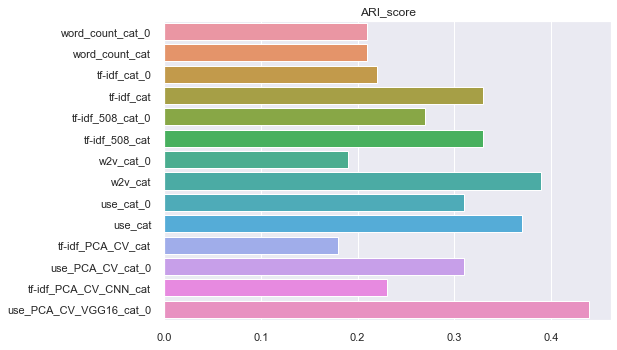

In [225]:
sns.barplot(x=ARI_scores, y=data_vs_cat)
plt.title('ARI_score')

In [226]:
del ARI_scores[12]
del data_vs_cat[12]

In [228]:
for k, (i, j) in enumerate(zip(ARI_scores, data_vs_cat)):
    print('pos: ', k, j, ':  ', i)

pos:  0 word_count_cat_0 :   0.21
pos:  1 word_count_cat :   0.21
pos:  2 tf-idf_cat_0 :   0.22
pos:  3 tf-idf_cat :   0.33
pos:  4 tf-idf_508_cat_0 :   0.27
pos:  5 tf-idf_508_cat :   0.33
pos:  6 w2v_cat_0 :   0.19
pos:  7 w2v_cat :   0.39
pos:  8 use_cat_0 :   0.31
pos:  9 use_cat :   0.37
pos:  10 tf-idf_PCA_CV_cat :   0.18
pos:  11 use_PCA_CV_cat_0 :   0.31
pos:  12 use_PCA_CV_VGG16_cat_0 :   0.44


# Classification images

Utilisons VGG16 avec la couche de prédiction

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# import numpy as np

model = VGG16(weights='imagenet')

img_path = path
images = tf.image.resize(list(imgs_dict.values()), size=[224,224])
# img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(images)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

dict_img_classes = feature_vectors(imgs_dict, model)